In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
print(df.keys())

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


In [6]:
print(df.Purchased)

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64


In [8]:
df.head(20)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [9]:
df = df.drop("Gender",axis='columns')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       1000 non-null   int64
 1   Age           1000 non-null   int64
 2   AnnualSalary  1000 non-null   int64
 3   Purchased     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [11]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [12]:
df.isnull().sum()

User ID         0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [13]:
#EDA

In [14]:
#Correlation
df.corr()

,User ID,Age,AnnualSalary,Purchased
User ID,1.000000,0.017647,0.006541,0.015911
Age,0.017647,1.000000,0.166042,0.616036
AnnualSalary,0.006541,0.166042,1.000000,0.364974
Purchased,0.015911,0.616036,0.364974,1.000000


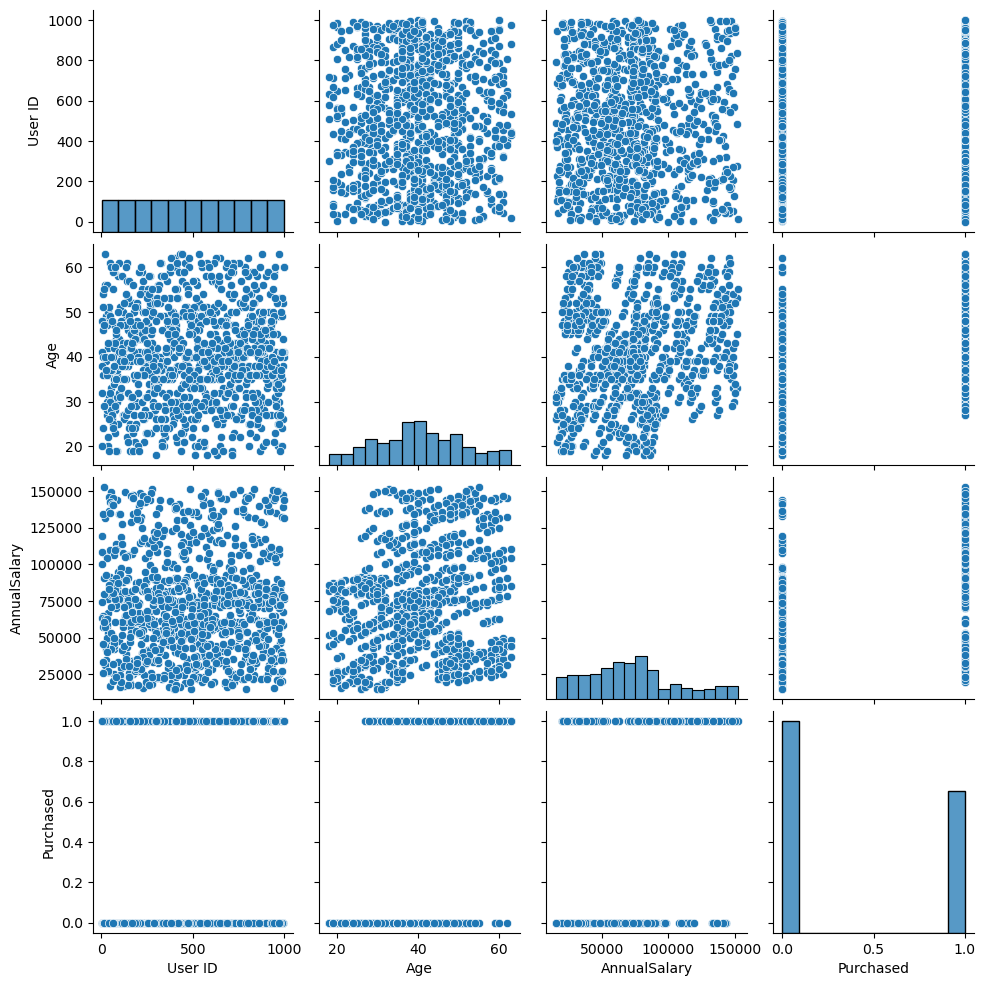

In [15]:
import seaborn as sns
sns.pairplot(df)

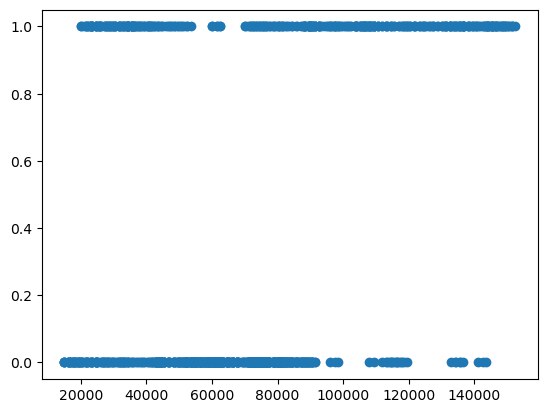

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['AnnualSalary'],df['Purchased'])

<Axes: xlabel='Age', ylabel='Purchased'>

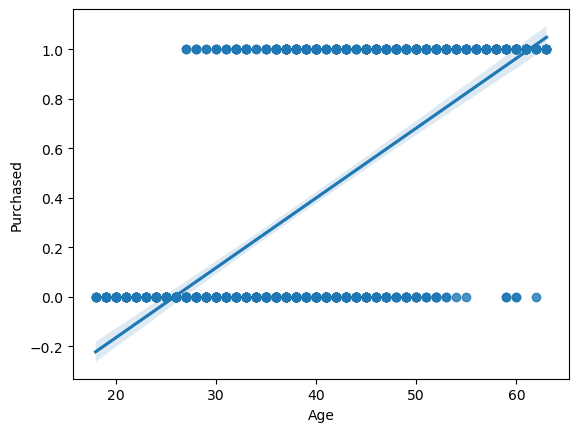

In [19]:
sns.regplot(x='Age',y='Purchased',data=df)

In [20]:
#dividing into depndent and independent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)

In [22]:
#Sandardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
lr.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
"""print(lr.coef_)
print(lr.intercept_)"""

'print(lr.coef_)\nprint(lr.intercept_)'

In [25]:
#on which parameters reg is trained
lr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
pred = lr.predict(X_test)

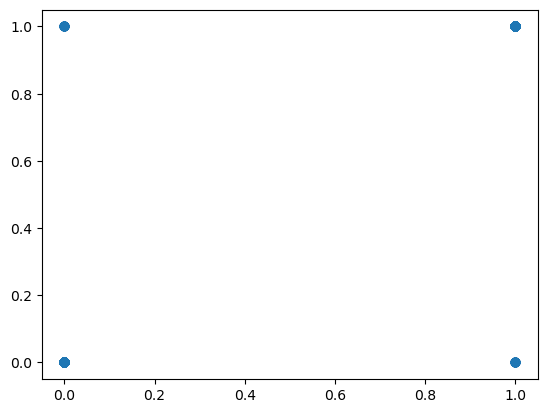

In [27]:
plt.scatter(y_test,pred)

In [28]:
error = y_test - pred

In [29]:
error

521    0
737    0
740    0
660    0
411   -1
      ..
262    0
610   -1
297    0
414    0
150    0
Name: Purchased, Length: 700, dtype: int64

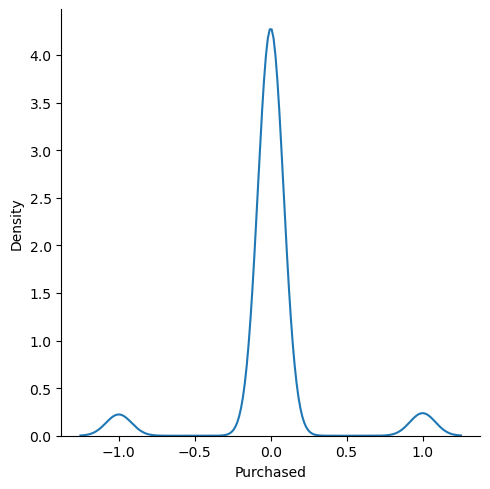

In [30]:
sns.displot(error,kind='kde')

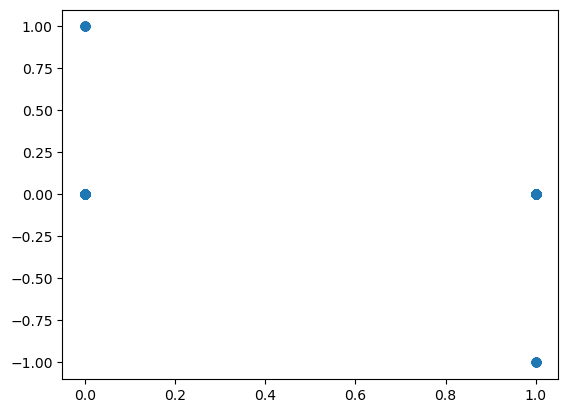

In [31]:
plt.scatter(pred,error)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.09714285714285714
0.09714285714285714
0.31167748898959186


In [33]:
#R square and adjusted R square
from sklearn.metrics   import r2_score
score = r2_score(y_test,pred)
score

0.5961858223896297

In [34]:
#New data pred 
df.shape

(1000, 4)

In [35]:
import pickle
pickle.dump(RandomForestClassifier,open('RFmodel.pkl','wb'))

In [36]:
pklmodel = pickle.load (open('RFmodel.pkl','rb'))

In [37]:
pklmodel.predict

<function sklearn.ensemble._forest.ForestClassifier.predict(self, X)>